In [1]:
# Necessay Libraries
import numpy as np
import pandas as pd

In [3]:
#user ratings
y = pd.read_excel('ex8_movies.xlsx', sheet_name = 'y', header = None)

In [4]:
y.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,5,4,0,0,4,4,0,0,0,4,...,2,3,4,0,4,0,0,5,0,0
1,3,0,0,0,3,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,5
2,4,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
3,3,0,0,0,0,0,5,0,0,4,...,5,0,0,0,0,0,2,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#now finding whether user have given ratings  or not
r = pd.read_excel('ex8_movies.xlsx', sheet_name = 'R', header = None)

In [7]:
r.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,True,True,False,False,True,True,False,False,False,True,...,True,True,True,False,True,False,False,True,False,False
1,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
for i in range(len(r.columns)):
  r[i] = r[i].replace({True:1, False:0})

In [9]:
r.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,1,1,0,0,1,1,0,0,0,1,...,1,1,1,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#now finding whether user have given ratings  or not
X = pd.read_excel('movie_params.xlsx', sheet_name = 'X', header = None)

In [12]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,1.048686,-0.400232,1.194119,0.371128,0.407607,0.974407,-0.058410,0.861721,-0.697290,0.288746
1,0.780851,-0.385626,0.521198,0.227355,0.570109,0.641264,-0.550006,0.704021,-0.485835,-0.564624
2,0.641509,-0.547854,-0.083796,-0.598519,-0.017694,0.299736,-0.720807,0.838546,-0.694832,-1.134796
3,0.453618,-0.800218,0.680481,-0.081743,0.136601,0.907561,0.277682,0.369300,-1.261208,-0.235581
4,0.937538,0.106090,0.361953,0.086646,0.287505,0.518644,-0.056871,0.914573,-0.819334,-0.542847


In [14]:
#now finding whether user have given ratings  or not
theta = pd.read_excel('movie_params.xlsx', sheet_name = 'theta', header = None)


In [15]:
theta.head()

,0,1,2,3,4,5,6,7,8,9
0,0.285444,-1.684265,0.262939,-0.287317,0.585725,0.980188,-0.063375,0.767232,-1.104602,-0.251867
1,0.505013,-0.454648,0.317462,-0.115087,0.567704,0.818905,0.461649,1.093063,-1.200294,-0.391617
2,-0.431917,-0.478804,0.846711,-0.011731,-0.138578,0.742591,-0.440276,1.363340,-0.325235,-0.194682
3,0.728598,-0.271894,0.326844,-0.250724,-0.471017,1.215827,-0.106129,1.615801,-0.670805,0.129868
4,0.052119,-1.380697,0.637941,-0.231980,0.246337,1.438879,-0.860022,0.668077,-0.560330,0.414959


In [16]:
# no. of movies and no. of users
y.shape

(1682, 943)

In [17]:
# no. of movies and their respective features
X.shape


(1682, 10)

In [18]:
theta.shape

(943, 10)

In [19]:
def costfunction(X, y, r, theta, Lambda):
    predictions = np.dot(X, theta.T)
    err = predictions-y
    J = 1/2 * np.sum((err**2) * r)
    reg_x = Lambda/2 *(np.sum(theta**2))
    reg_theta = Lambda/2 *(np.sum(X**2))
    grad = J + reg_x + reg_theta
    return J, grad

In [20]:
def gradientDescent(X, y, r, theta, Lambda, num_iter, alpha):
    J_hist = []
    for i in range(num_iter):
        cost, grad = costfunction(X, y, r, theta, Lambda)
        X = X -  alpha*(np.dot(np.dot(X, theta.T) - y, theta) + Lambda*X)
        theta = theta - alpha*(np.dot((np.dot(X, theta.T) - y).T, X) + Lambda*theta)
        J_hist.append(cost)
    return X, theta, J_hist

In [21]:
def normalizeRatings(y, r):
    ymean = np.sum(y, axis=1)/np.sum(r, axis=1)
    ynorm = np.sum(y, axis=1)*np.sum(r, axis=1) - ymean
    return ymean, ynorm

In [22]:
## new entry [ my entry]
my_ratings = np.zeros((1682,1))
my_ratings[5] = 5
my_ratings[50] = 1
my_ratings[9] = 5
my_ratings[27]= 4
my_ratings[58] = 3
my_ratings[88]= 2
my_ratings[123]= 4
my_ratings[165] = 1
my_ratings[187]= 3
my_ratings[196] = 2
my_ratings[228]= 4
my_ratings[258] = 5
my_ratings[343] = 4
my_ratings[478] = 1
my_ratings[511]= 4
my_ratings[690] = 5
my_ratings[722]= 1
my_ratings[789]= 3
my_ratings[832] = 2
my_ratings[1029]= 4
my_ratings[1190] = 2
my_ratings[1245]= 5

In [23]:
y1 = np.hstack((my_ratings, y))

In [24]:
y1.shape

(1682, 944)

In [26]:
my_r = np.zeros((1682,1))
for i in range(len(r)):
    if my_ratings[i] !=0:
        my_r[i] = 1

r1 = np.hstack((my_r, r))


In [27]:
# normalizing ratings
y_mean , y_norm  = normalizeRatings(y1,r1)

In [30]:
num_users = y1.shape[1]
num_movies = y1.shape[0]
num_features = X.shape[1]
Lambda = 10
X1 = np.random.randn(num_movies,num_features)
theta1 = np.random.randn(num_users,num_features)

X_,theta_,Cost_ = gradientDescent(X1,y1,r1,theta1,Lambda,500,0.001)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

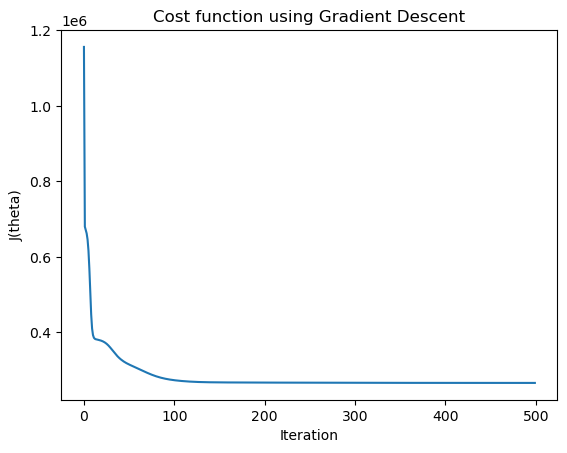

In [31]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(Cost_)
plt.xlabel("Iteration")
plt.ylabel("J(theta)")
plt.title("Cost function using Gradient Descent")
   

In [32]:
p = np.dot(X_,theta_.T)

In [33]:
##my predictions
my_pred = p[:,0]+y_mean
my_pred = pd.DataFrame(my_pred)

In [36]:
encodings = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']

for encoding in encodings:
    try:
        with open('movie_ids.txt', 'r', encoding=encoding) as file:
            movies = file.read().split("\n")[:-1]
        break
    except UnicodeDecodeError:
        continue
  

In [37]:
df = pd.DataFrame(np.hstack((my_pred,np.array(movies)[:,np.newaxis])))
     

In [38]:
df.head()

,0,1
0,3.862328737204409,1 Toy Story (1995)
1,3.3454625259992055,2 GoldenEye (1995)
2,3.0574027203104963,3 Four Rooms (1995)
3,3.7380136799738164,4 Get Shorty (1995)
4,3.2895054495588765,5 Copycat (1995)


In [39]:
df.sort_values(by=[0],ascending=False,inplace=True)
df.head(10)

,0,1
1499,5.010697506847551,1500 Santa with Muscles (1996)
813,5.010546814357711,"814 Great Day in Harlem, A (1994)"
1188,5.010118543984679,1189 Prefontaine (1997)
1200,5.007211661124917,1201 Marlene Dietrich: Shadow and Light (1996)
1292,5.001905066397634,1293 Star Kid (1997)
1652,5.001841016209569,1653 Entertaining Angels: The Dorothy Day Stor...
1535,5.001454822600367,1536 Aiqing wansui (1994)
1598,4.9998284607369285,1599 Someone Else's America (1995)
1121,4.999059070377217,1122 They Made Me a Criminal (1939)
1466,4.998582130587261,"1467 Saint of Fort Washington, The (1993)"
